# Introduction to Singular Value Decomposition (SVD) & Principal Component Analysis (PCA) 

### Goals: 

### 1. Using SVD to invert a matrix : We will create a rectangular matrix A which is a dataset representing 30 variables (columns) and 200 measurements (rows) with Gaussian random data. We will make 1 variable collinear, 30th variable a weighted linear combination of 3 other randomly selected variables and then decompose the matrix using the SVD. Since this matrix X is not invertible, show how SVD can be used to invert the matrix successfully with pseudoinverse 

### 2. Understanding PCA and calculating the number of significant components in PCA using SVD: We will create a dataset X with 30 variables and 200 measurements using Gaussian random data. We will introduce 2 covariation patterns: for e.g. features 1:5 covary together positively, features 15:20 covary together negatively. Then we perform PCA on this dataset and plot the cumulative variance accounted for (VAF to determine how many PCs does it take to hit 90% of total variance and identify the 2 main PCs. To do this, create a separate matrix, with gaussian data and without covaration. Examine the average VAF as you move from one component to another. This is your threshold, to compare with.

In [155]:
from scipy import linalg as la
from scipy.stats import norm
from sklearn import datasets 
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

%matplotlib inline

## First create a matrix of random numbers


In [2]:
mat_size = 5
A = np.random.rand(mat_size, mat_size)
print(A)

[[0.92230752 0.23166073 0.77845305 0.81647326 0.57581382]
 [0.72182043 0.61275106 0.61789177 0.47114376 0.41490367]
 [0.69154764 0.06607639 0.02313438 0.80485042 0.42086236]
 [0.49024169 0.87104186 0.59242235 0.00140397 0.05570451]
 [0.10374096 0.16382193 0.88330802 0.3756295  0.83277618]]


## Convert numPy array of arrays to matrix and check its dimensions

In [3]:
B = np.asmatrix(A)
print(B.shape)

(5, 5)


## NumPy has function [svd](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) that can be used to compute the Singular value decomposition of matrix A which factorizes the matrix A into two unitary matrices $U$ and $V^T$, and a 1-D array $s$ of singular values (real, non-negative) such that $A = U S V^T$, where S is a suitably shaped matrix of zeros with main diagonal with values of array s (diagnoal version of array s).  
### U = Unitary matrix having left singular vectors as columns. Of shape $(M, K)$
### s = NumPy array of singular values, sorted in non-increasing order. Of shape $(K,)$ with $K = min(M, N)$
### $V^T$ = Unitary matrix having right singular vectors as rows. Of shape $(K, N)$ 

In [4]:
U, S, V = la.svd(B)
print(U.shape)
print(S.shape)
print(V.shape)

(5, 5)
(5,)
(5, 5)


## Note: S is an array => need to convert it into a square matrix using Numpy's Diag function

In [5]:
print(S)
type(S)

[2.59604192 1.00221742 0.83255049 0.23934884 0.01453252]


numpy.ndarray

In [6]:
S_sq = np.diag(S)
print(S_sq)

[[2.59604192 0.         0.         0.         0.        ]
 [0.         1.00221742 0.         0.         0.        ]
 [0.         0.         0.83255049 0.         0.        ]
 [0.         0.         0.         0.23934884 0.        ]
 [0.         0.         0.         0.         0.01453252]]


## Compute the inverse of square matrix B as $C = V^{-1} S^{-1} U^T$

In [7]:
C =  V.transpose() @ (la.inv(S_sq) @ U.transpose())
print(C)

[[ -2.86903649  27.48989651 -10.74448739 -16.78987433  -5.15913661]
 [ -0.2910393   -9.46103876   4.90774137   7.14063983   1.95701407]
 [  3.30257218 -11.28101101   2.47261623   6.55988614   1.64848597]
 [  5.24644875 -36.58812454  14.62660638  22.15655241   5.72730301]
 [ -5.45475999  26.90552922  -8.84705761 -16.26493506  -2.87334455]]


 ## If the SVD of square matrix B is correct then $B.C = I_{n}$ where $I_{n}$ is the identity matrix We can check by taking the difference $B.C = I_{n}$ and rounding the values. If SVD worked we should get a nxn matrix of zeros!

In [8]:
id = B @ C
delta = id - np.identity(mat_size)
print(delta.round())

[[ 0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [-0.  0. -0. -0. -0.]
 [ 0.  0. -0. -0. -0.]]


## Next we create a matrix A where the last column is a linear combination of 3 other columns
## Since this matrix does not have all L.I. columns, it will be singular. 
## We can use this to demonstrate how SVD can be used to perform a matrix inversion like operation.

In [10]:
mu, sigma = 0, 1 # Set normal distribution parameters
nvars, nobs = 30, 200 # Set mnumber of variables and observations
A = np.random.randn(nobs, nvars)
print(A)
A.shape

[[-1.53255995  1.01394829 -0.81638438 ... -1.20476328 -1.23932402
  -0.07897511]
 [ 0.23575957  0.75685611 -0.40489012 ...  0.1972835  -0.17412388
  -0.4943598 ]
 [ 0.85790775  0.91804364 -0.9979622  ...  0.03917134 -1.25212883
   0.26916223]
 ...
 [-0.22453532  0.89158564 -1.19185987 ... -0.63781024 -0.37858396
  -0.27939358]
 [ 0.73943808 -1.33537744 -1.78603962 ... -0.82478106 -0.59209596
   1.37743224]
 [-1.08884393 -0.2265798   0.71318464 ... -0.41598884  1.37834049
  -0.64133464]]


(200, 30)

## To understand how SVD can be used to compute pseudoinverse, we construct a singular matrix and calculate it's SVD. 
### To create a singular matrix, we replace the last column of A with a linear combination of 3 other columns. Then we check that the new matrix is singular by calculating condition number of matrix A and comparing that with $\frac{1}{\epsilon}$ where $\epsilon$ is the smallest fraction > 0 that can be represented as a float. 
#### Note: NumPy defines [condition number of x](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html) as the norm of x times the norm of the inverse of x the norm which can be the usual L2-norm (root-of-sum-of-squares) or one of a number of other matrix norms $cond(A) = \|A\| \|A^{-1}\|$ 

In [11]:
linear_comb_coeffs = np.asmatrix([2, 5, 7]).transpose()
dependent_cols = np.around(28*np.random.rand(3), decimals=0).astype('int')
print("We will replace last column of A with linear combination of columns: ", str(dependent_cols))
#print(dependent_cols)
#print(linear_comb_coeffs)
# print(A[:, dependent_cols].shape)
# print(linear_comb_coeffs.shape)
# We can compute the linear combination of the 3 columns chosen by mutiplying the matrix slice with coeffs column vector
x =  np.squeeze(np.asarray(A[:, dependent_cols] @ np.asmatrix(linear_comb_coeffs)))
# print(x)
# print(x.shape)
# y = np.squeeze(np.asarray(x))
# print(y.shape)
# print(type(y))
# print(A[:, -1].shape)
# print(type(A[:, -1]))
A[:, -1] = x
print("Condition number of matrix A is: ", np.linalg.cond(A))
print("1/epsilon is : ", 1/sys.float_info.epsilon)
# print(np.spacing)
if np.linalg.cond(A) < 1/sys.float_info.epsilon:
    i = np.linalg.inv(A)
else:
    #Singular as expected!
    print("Condition number of matrix A >= 1/epsilon") 
    print("Matrix A is singular!")

We will replace last column of A with linear combination of columns:  [ 7  9 11]
Condition number of matrix A is:  3.0954525122540144e+16
1/epsilon is :  4503599627370496.0
Condition number of matrix A >= 1/epsilon
Matrix A is singular!


### Since inverses are only defined for non-singular square matrices, we can compute something similar to an inverse for a rectangular matrix or a singular square matrix called pseudeoinverse or [Moore-Penrose inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse). The pseudo-inverse of a matrix A, denoted $A^+$, is defined as the matrix that ‘solves’ the least-squares problem $Ax = b$ i.e., if $\bar{x}$ is the solution, then $A^+$ is that matrix such that $\bar{x} = A^+b$.

### If $U S V^T = A$ is SVD of matrix A then $A^+ = V^{-1} S^{-1} U^T$, where U, V are orthogonal left and right singular matrices, S is a diagonal matrix consisting of A’s singular values in descening order, $S^{-1}$ is a diagonal matrix consisting of the reciprocals of A’s singular values.

#### NumPy has a handy function which computes the pseudoinverse [pinv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)

#### Let us compute the pseudoinverse $A^+$ of  rectangular matrix $A$ that we constructed before by setting the last column to be the linear combination of 3 other columns using SVD and pinv functions 

#### $A^{+}$ exists for any matrix $A$, but, when A has full rank i.e. the rank of A is $\min\{m,n\}$ then $A^{+}$ can be simplified:  When A has linearly independent columns, the pseudeoinvese constitutes a left inverse, since, in this case, $A^{+}A=I$  When A has linearly independent rows, pseudeoinverse is a right inverse because  $AA^{+}=I$.

In [39]:
B = np.asmatrix(A)
print("Shape of matrix A: ", A.shape)
print("Rank of Matrix A " , np.linalg.matrix_rank(B))
U, S, VT = la.svd(B, full_matrices=False)
m,n = A.shape
# print(U.shape)
# print(S.shape)
# print(VT.shape)
S_sq = np.diag(S)

print("Shape of U-transpose ", U.transpose().shape)
print("Shape of S inverse ", la.inv(S_sq).shape)
print("Shape of VT-transpose ", VT.transpose().shape)
# print(S_sq)
B_plus =  np.asmatrix(VT.transpose() @ la.inv(S_sq) @ U.transpose())
print("Shape of A+: ", B_plus.shape)
B_Bplus_B = B @ B_plus @ B
Bplus_B_Bplus = B_plus @ B @ B_plus
print("Shape of A.A+.A = ", B_Bplus_B.shape)
print("Shape of A+.A.A+ = ",Bplus_B_Bplus.shape)
# print("A+.A = \n", B_plus @ B)
# print("A.A+ = \n", B @ B_plus)
delta1 = B_Bplus_B - B
print("Check: A.A+.A = A should be all zeroes : \n", delta1.round())
delta2 = Bplus_B_Bplus - B_plus
print("Check: A+.A.A+ - A+ should be all zeroes : \n ", delta2.round())
P, r = la.pinv2(B, return_rank=True)
print("Rank of pseudoinverse:", r)
delta3 = B @ P @B - B
print("Check: pinv(A) - A+ should be all zeroes : \n", delta3.round())
delta4 = P @ B - np.asmatrix(np.identity(S.shape[0]))
print("Check: pinv(A).A  - I should be all zeroes : \n", delta3.round())

Shape of matrix A:  (200, 30)
Rank of Matrix A  29
Shape of U-transpose  (30, 200)
Shape of S inverse  (30, 30)
Shape of VT-transpose  (30, 30)
Shape of A+:  (30, 200)
Shape of A.A+.A =  (200, 30)
Shape of A+.A.A+ =  (30, 200)
Check: A.A+.A = A should be all zeroes : 
 [[-0.  0.  0. ...  0. -0. -0.]
 [-0. -0. -0. ... -0. -0.  0.]
 [-0. -0. -0. ... -0.  0.  0.]
 ...
 [-0.  0. -0. ... -0.  0. -0.]
 [-0.  0. -0. ... -0.  0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]]
Check: A+.A.A+ - A+ should be all zeroes : 
  [[-0.00000000e+00  0.00000000e+00 -0.00000000e+00 ...  0.00000000e+00
  -0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 ...  0.00000000e+00
  -0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 ... -0.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 ...
 [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 ...  0.00000000e+00
  -0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 ... -0.00000000e+

In [219]:
# d = 10;    # number of obs
# k = 5;      # number of variables

# W = np.asmatrix(np.random.rand(d,k))
# print("W matrix is: ", W)
# S = W.transpose() @ W + np.diag(np.asmatrix(np.random.rand(1,k)))
# print("S matrix is: ", S)
# col_corr = np.corrcoef(S)

# # S = np.diag(1./np.sqrt(np.diag(S))) * S * np.diag(1./np.sqrt(np.diag(S)))
# print("Correlation matrix is: ", col_corr)
# print("Rank of Matrix W " , np.linalg.matrix_rank(W))

### To generate correlated normally distributed random samples, one can first generate uncorrelated normally distributed samples, and then multiply them by a matrix C such that $C C^T= R$ where R is the desired covariance matrix. C can be created, for example, by using the Cholesky decomposition of R, or from the eigenvalues and eigenvectors of R.
### First we generate positive semi-definite matrix for each group of correlated variables, here num_correlated_vars_block = 5 so each p.s.d matrix wil be 5 x 5 
### The symmetric matrix for covariances can be generated using $b_{sym} = \frac{b+b^T}{2}$ 

In [220]:
# This method does not work 
# num_samples = 200
# num_correlated_vars_block = 5

# # # Generate correlation matrix for 5 variables that are correlated
# # Below method of using c*c^T =R to generate covariance matrx does not work
# # p = np.random.uniform(10, 20, (num_correlated_vars_block, num_correlated_vars_block))
# # p = np.random.rand(num_correlated_vars_block,num_correlated_vars_block)
# # pos_cov_vars = np.dot(p, p.T) 
# # pos_cov_vars = (p + p.T)/2

# # # np.fill_diagonal(pos_cov_vars, 1.000)
# # # Generate correlation matrix for 5 variables that are highly negatively correlated
# # n = np.random.uniform(-20, -10, (num_correlated_vars_block, num_correlated_vars_block))
# # n = np.random.rand(num_correlated_vars_block,num_correlated_vars_block)
# # # np.fill_diagonal(neg_cov_vars, 1.000)

# # neg_cov_vars = np.dot(n, n.T) 
# # neg_cov_vars = (n + n.T)/2

# # np.fill_diagonal(neg_cov_vars, np.array(-1.0 * np.diagonal(neg_cov_vars)))



# # Following code is inspired by SciPy Cookbook recipe: https://scipy-cookbook.readthedocs.io/items/CorrelatedRandomSamples.html 

# #  Matrices need to be positive semidefinite for eigenvalues to be computable based on random dist. 
# pos_cov_vars = sklearn.datasets.make_spd_matrix(5, random_state=None)
# neg_cov_vars = sklearn.datasets.make_spd_matrix(5, random_state=None)
# # print(x_corr_col_set1)


# # print(np.linalg.matrix_rank(pos_cov_vars))
# # print(np.linalg.matrix_rank(neg_cov_vars))
# print(pos_cov_vars)
# print(neg_cov_vars)

# # Generate samples from 5 independent normally distributed random
# # variables (with mean 0 and std. dev. 1).
# var_set1 = norm.rvs(size=(num_correlated_vars_block, num_samples))
# var_set2 = norm.rvs(size=(num_correlated_vars_block, num_samples))

# # print(corr_set1)
# # print(corr_set2)



# # Compute the eigenvalues and eigenvectors of correlation matrix and create the co-varying columns
# # Construct matrix of covarying columns c, so c*c' = r where r = correl matrix
# eigenvals_set1, eigen_vecs_set1 = la.eigh(pos_cov_vars)
# # print(eigenvals_set1)
# x_corr_col_set1 = np.dot(eigen_vecs_set1, np.diag(np.sqrt(eigenvals_set1)))

# eigenvals_set2, eigen_vecs_set2 = la.eigh(neg_cov_vars)
# # print(eigenvals_set2)
# x_corr_col_set2 = np.dot(eigen_vecs_set2, np.diag(np.sqrt(eigenvals_set2)))
# # print(x_corr_col_set1)
# # print(x_corr_col_set2)

# # L1 = la.cholesky(pos_cov_vars)
# # print(L1)

# # L2 = la.cholesky(neg_cov_vars)
# # print(L2)

# # x_corr_col_set1 = L1
# # x_corr_col_set2 = L2

# xblock_1 = np.dot(x_corr_col_set1, var_set1).T
# # print(xblock_1.shape)
# print(np.corrcoef(y1))


# xblock_2 = np.dot(x_corr_col_set2, var_set2).T
# # print(xblock_2.shape)
# print(np.corrcoef(y2))




### We will create a dataset X with 30 variables and 200 measurements using Gaussian random data. We will introduce 2 covariation patterns: for e.g. features 1:5 covary, features 15:20 covary together with high correlations (0.9+).

In [224]:
#  Create a group of 5 highly correlated variables
p = np.random.uniform(0.8, 1.0, (num_correlated_vars_block, num_correlated_vars_block))
p_mat = np.dot(p, p.T)
print(np.linalg.eigvals(p_mat))
print(p_mat)
print(np.corrcoef(p_mat))

# Create another group of highly correlated variables
# Note it is not possible to create very highly negatively correlated variables 
# For n variables in this highly negatively correlated blocks some of the eigenvalues become negative which means the covariance matirx is not positive definitve and it cannot be decomposed
# In general with n variables, the negative correlation of any 2 variables has to be between [-1/(n-1), 1]. For example, for 5 variables the most negative the correlation can go is -0.25
n = np.random.uniform(0.7, 1.0, (num_correlated_vars_block, num_correlated_vars_block))
n_mat = np.dot(n, n.T)
# np.fill_diagonal(n_mat, 1)
print(np.linalg.eigvals(n_mat))
print(n_mat)
print(np.corrcoef(n_mat))


samples = 200
data_block1 = np.random.multivariate_normal([0, 0, 0, 0, 0], p_mat, size=samples)
print(data_block1.shape)
print(np.corrcoef(data_block1.T))

data_block2 = np.random.multivariate_normal([0, 0, 0, 0, 0], n_mat, size=samples)
print(data_block2.shape)
print(np.corrcoef(data_block2.T))

nvars, nobs = 30, 200 # Set mnumber of variables and observations
X = np.random.randn(nobs, nvars)
X.shape

X[:, 4:9] = data_block1
X[:, 14:19] = data_block2

# print(np.corrcoef(X.T))


[1.99048279e+01 3.84798013e-02 1.61954691e-02 4.10825672e-04
 4.62105944e-03]
[[3.72110517 3.84931853 3.80919809 3.92116123 3.92305361]
 [3.84931853 4.03272022 3.9665031  4.06266904 4.06231053]
 [3.80919809 3.9665031  3.91906136 4.0154425  4.01764776]
 [3.92116123 4.06266904 4.0154425  4.15425074 4.13287151]
 [3.92305361 4.06231053 4.01764776 4.13287151 4.13739754]]
[[1.         0.97214472 0.99007286 0.99599769 0.99975796]
 [0.97214472 1.         0.99456293 0.96788914 0.97638484]
 [0.99007286 0.99456293 1.         0.98489661 0.99246438]
 [0.99599769 0.96788914 0.98489661 1.         0.99479471]
 [0.99975796 0.97638484 0.99246438 0.99479471 1.        ]]
[1.85170515e+01 8.13082093e-02 4.42274106e-02 3.08326032e-03
 1.10464735e-02]
[[3.62986367 3.41311035 3.7487694  3.72167293 3.76117577]
 [3.41311035 3.22928753 3.53830093 3.52198299 3.54291325]
 [3.7487694  3.53830093 3.92059826 3.86966871 3.8747332 ]
 [3.72167293 3.52198299 3.86966871 3.93864276 3.90918041]
 [3.76117577 3.54291325 3.8747

## Perform PCA on the X matrix with covarying columns

[0.3684249  0.66127983 0.68868922 0.71499971 0.73839642 0.76132768
 0.78326236 0.80393008 0.82367578 0.84242422 0.86003583 0.87679819
 0.89295915 0.90795242 0.9222449  0.93578149 0.94756115 0.95901175
 0.96955632 0.97947658 0.98878478 0.99668982 0.99818412 0.99888411
 0.99947061 0.9997242  0.99987535 0.99994918 0.99999386 1.        ]


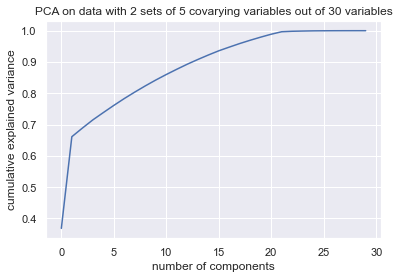

In [230]:

pca_y = PCA().fit(X)
var_expl = np.cumsum(pca_y.explained_variance_ratio_)
plt.plot(var_expl)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('PCA on data with 2 sets of 5 covarying variables out of 30 variables')
print(var_expl)

## Create a baseline matrix Y with random normal but uncorrelated variables

[0.06165437 0.11807284 0.173657   0.2268642  0.27856314 0.3253179
 0.37035965 0.41211918 0.45259797 0.49156531 0.52895787 0.56469595
 0.59913557 0.63247769 0.66443067 0.69510156 0.72452811 0.75250104
 0.77989285 0.80587898 0.83163241 0.85518543 0.87709467 0.89864523
 0.91891179 0.93785694 0.95654679 0.9729001  0.98789358 1.        ]


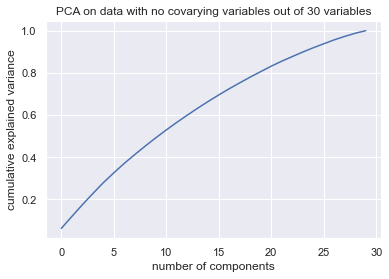

In [231]:
nvars, nobs = 30, 200 # Set mnumber of variables and observations
Y = np.random.randn(nobs, nvars)
Y.shape

# print(np.corrcoef(Y))

pca_y = PCA().fit(Y)
var_exp2 = np.cumsum(pca_y.explained_variance_ratio_)
plt.plot(var_exp2)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('PCA on data with no covarying variables out of 30 variables')
print(var_exp2)

### Comparing the variance explained plots, we can clearly see that PCA has reduced the dimensionality of the problem: Over 65% of the variation can be explained by just 2 Principal components while 90% of the variation in the data is explained by only 13 PCs. For the uncorrelated dataset, 90% variation is explained by 25 PCs, clearly showing the gains with dimensionalty reduction

In [221]:
#  Example to create 2 covarying normal random variables with specified correlations
# samples = 200
# r = 0.9

# # Generate pearson correlated data with approximately cor(X, Y) = r
# import numpy as np
# data = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], size=samples)
# P, Q = data[:,0], data[:,1]
# print(P, Q)
# # That's it! Now let's take a look at the actual correlation:
# import scipy.stats as stats
# print ('r=', stats.pearsonr(P, Q)[0])